# Use Case: social Network Analysis
<img src="https://nikhilwins.files.wordpress.com/2016/01/facebook-api1.png">
         

In [1]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


## Data Set
We use a [data set](https://snap.stanford.edu/data/egonets-Facebook.html) from Stanford, containing ***Facebook*** data:

### Description
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value....

In [3]:
import pandas as pd

df = pd.read_csv(path+'/DATA/facebook_combined.txt')

In [13]:
df.head()


,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6


Looks like the data came as a list of edges (tuple of connected node IDs) -> we have an undirected graph with no edge weights.

## Generate a Graph

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [7]:
#generate from edges
G_fb = nx.read_edgelist(path+"/DATA/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

## Get first impression of the data

In [8]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


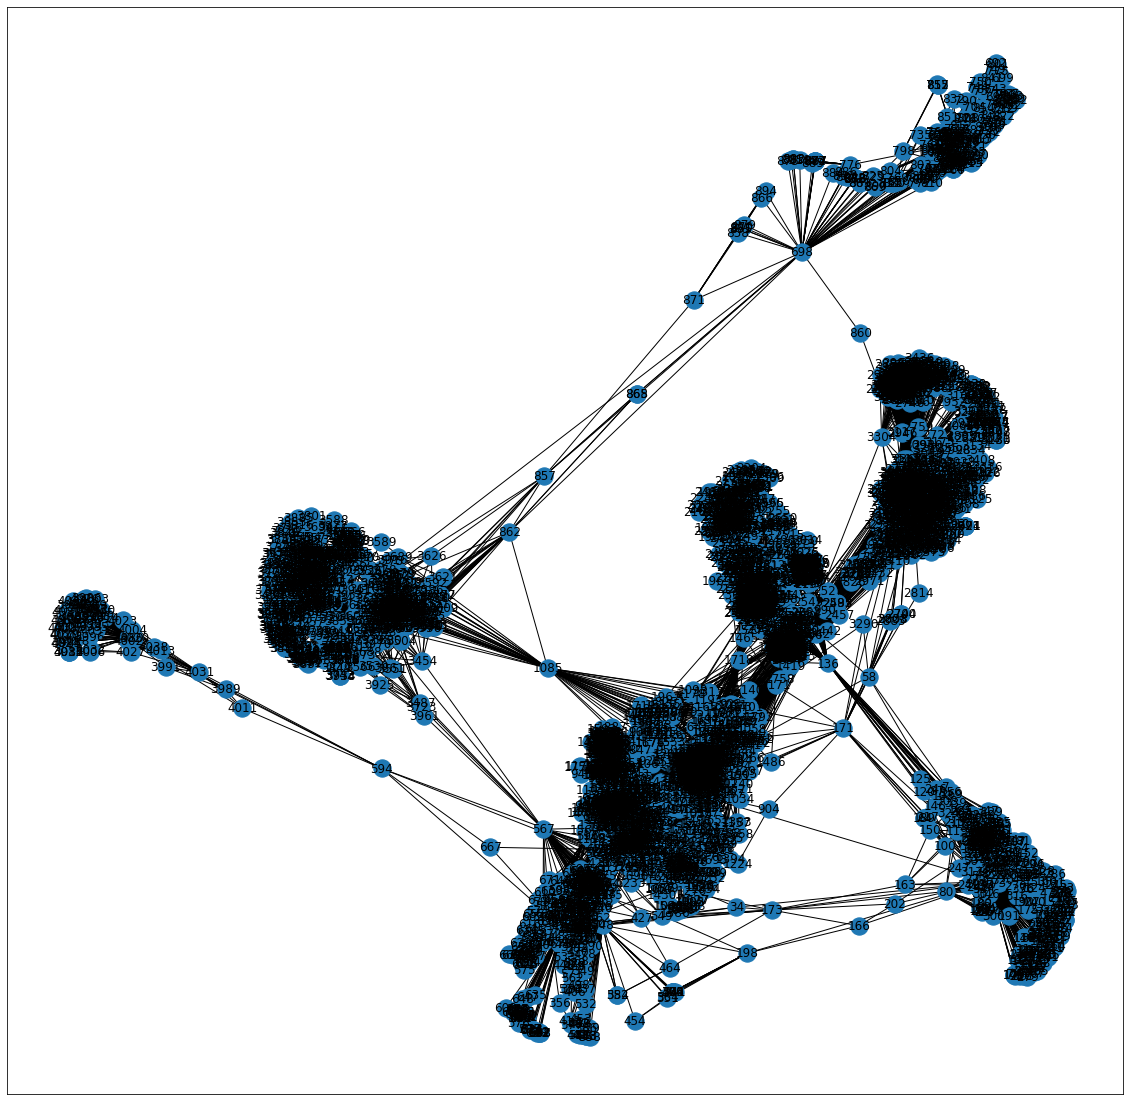

In [9]:
#plot graph - this can take some time!
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

## Task: find the ***Influencers*** in this Network
* Who has the most connections?
* Who should we approach when we want to spread information?

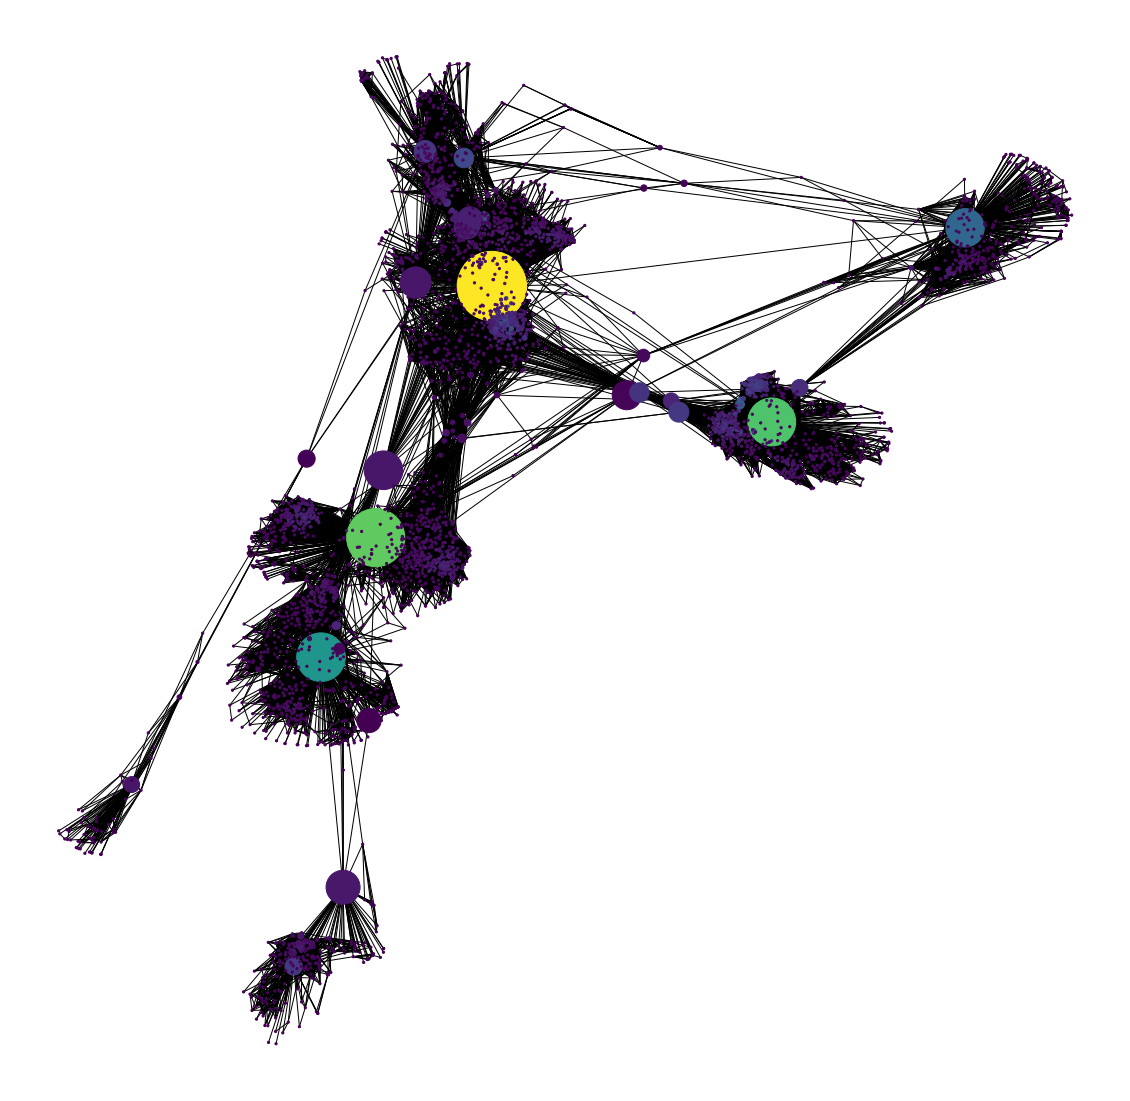

In [10]:
#visualize the centrality of nodes
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [11]:
#get list of our top5 influencers
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]